In [17]:
import pickle
import numpy as np
import cv2
import numpy
import glob
from sklearn.manifold import TSNE
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot

In [33]:
with open('ML_7641/Inception_V3.pkl', 'rb') as f:
    pca_features, images = pickle.load(f)

In [34]:
img_list1 = []
img_list2 = []
new_features = []
folders = glob.glob('ML_7641/new_clustered_data/*')

for folder in folders:
    
    for eachimage in glob.glob(folder+'/*.jpg'):
            
            img_list1.append(eachimage)
            

print(len(img_list1))

for j in range(0, len(img_list1)):

    for i in range (0, len(images)):
                
        img = images[i]
        if img in img_list1[j]:
                    
            img_list2.append(images[i])
            new_features.append(pca_features[i])
                
            

print(len(img_list1))
print(len(img_list2))
print(len(new_features))

5604
5604
5604
5604


In [20]:
import random
num_images_to_plot = 5604

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [35]:
from sklearn.decomposition import PCA
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(new_features)
feature_list_compressed = pca.transform(new_features)

X = np.array(feature_list_compressed)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=60, angle=0.2, verbose=2, metric='euclidean').fit_transform(X)



/Users/devshreebharatia/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 5604 samples in 0.000s...
[t-SNE] Computed neighbors for 5604 samples in 0.773s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5604
[t-SNE] Computed conditional probabilities for sample 2000 / 5604
[t-SNE] Computed conditional probabilities for sample 3000 / 5604
[t-SNE] Computed conditional probabilities for sample 4000 / 5604
[t-SNE] Computed conditional probabilities for sample 5000 / 5604
[t-SNE] Computed conditional probabilities for sample 5604 / 5604
[t-SNE] Mean sigma: 0.133686
[t-SNE] Computed conditional probabilities in 0.200s
[t-SNE] Iteration 50: error = 81.5412369, gradient norm = 0.0129101 (50 iterations in 1.503s)
[t-SNE] Iteration 100: error = 72.4010925, gradient norm = 0.0020001 (50 iterations in 0.996s)
[t-SNE] Iteration 150: error = 71.8855820, gradient norm = 0.0005877 (50 iterations in 0.984s)
[t-SNE] Iteration 200: error = 71.7801208, gradient norm = 0.0007570 (50 iterations in 0.985s)
[

In [37]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

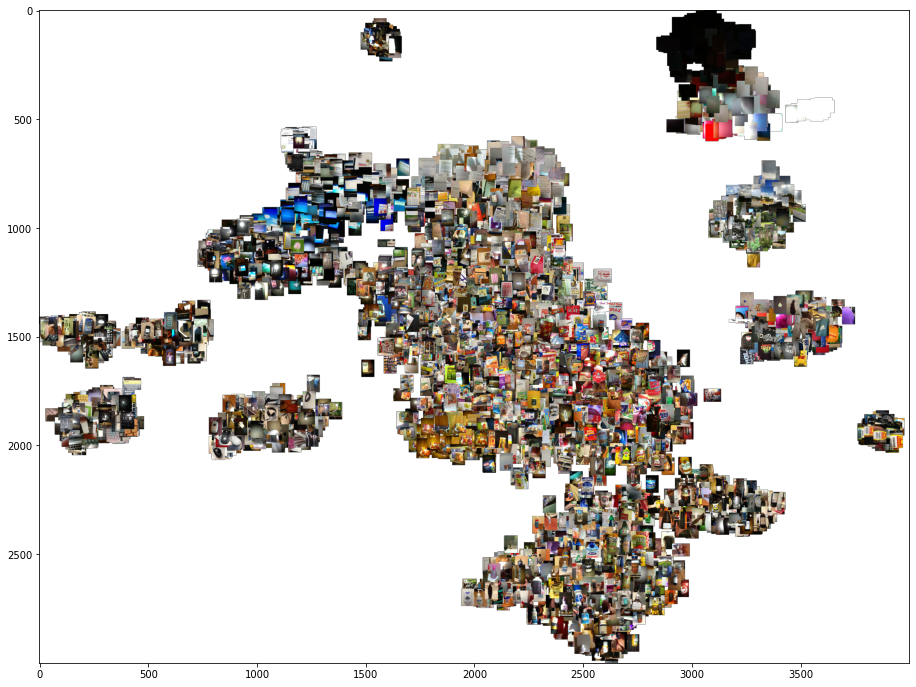

In [40]:


folders = glob.glob('ML_7641/new_clustered_data/*')
        
width = 4000
height = 3000
max_dim = 80

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(img_list2, tx, ty):
    
    for folder in folders:
    
        for eachimage in glob.glob(folder+'/*.jpg'):
            
            if img in eachimage:
    
                tile = Image.open(eachimage)
                rs = max(1, tile.width/max_dim, tile.height/max_dim)
                tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
                full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)